In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [288]:
df=pd.read_csv('prof_salary.csv')
df=pd.DataFrame(data=df)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [289]:
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [290]:
df['discipline'].unique()

array(['B', 'A'], dtype=object)

In [291]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [292]:
label_encoder=preprocessing.LabelEncoder()
df['rank']=label_encoder.fit_transform(df['rank'])
df['sex']=label_encoder.fit_transform(df['sex'])
df['discipline']=label_encoder.fit_transform(df['discipline'])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [293]:
df.isnull().sum()
#No null values present

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# EDA

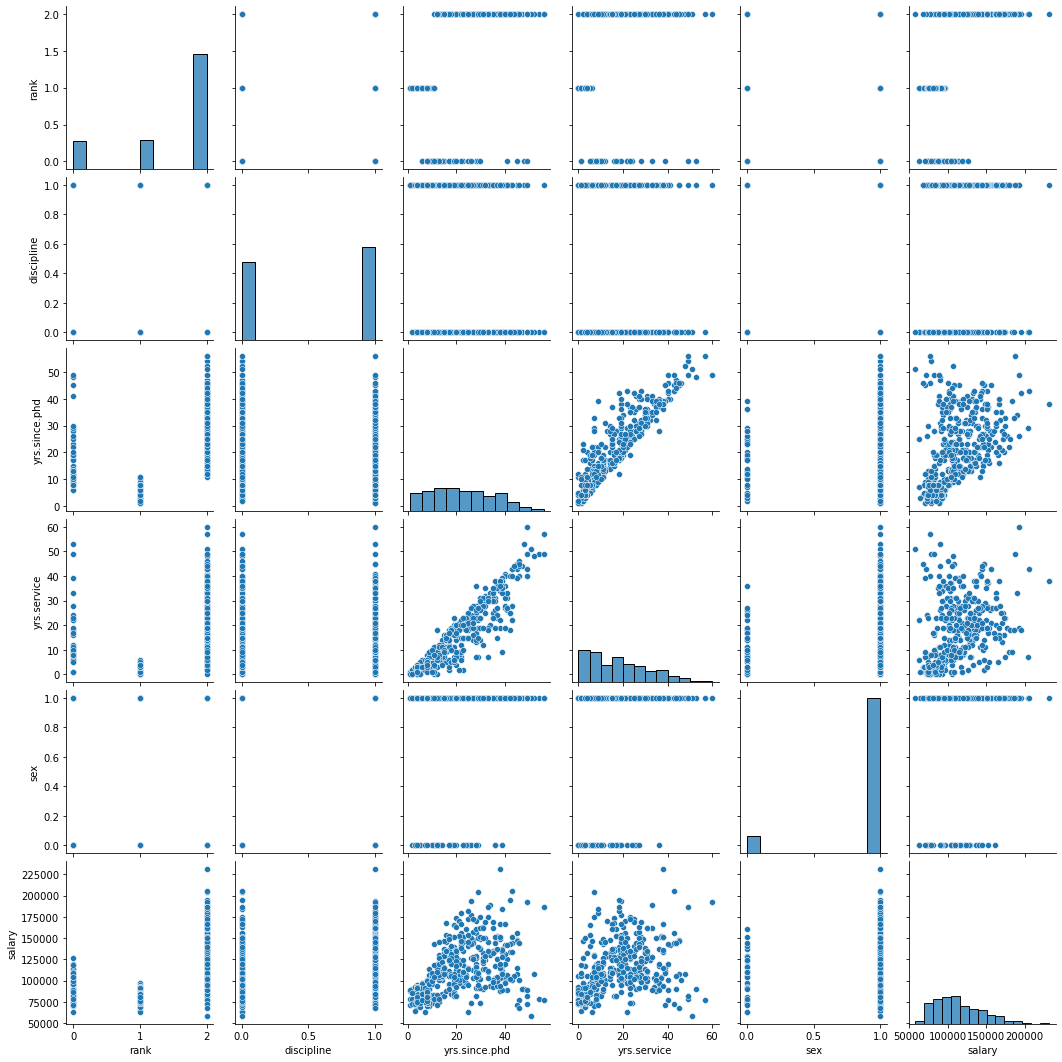

In [294]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

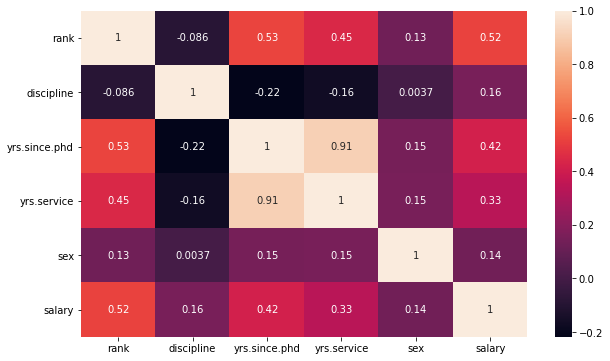

In [295]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [296]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [297]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

rank                AxesSubplot(0.125,0.657941;0.168478x0.222059)
discipline       AxesSubplot(0.327174,0.657941;0.168478x0.222059)
yrs.since.phd    AxesSubplot(0.529348,0.657941;0.168478x0.222059)
yrs.service      AxesSubplot(0.731522,0.657941;0.168478x0.222059)
sex                 AxesSubplot(0.125,0.391471;0.168478x0.222059)
salary           AxesSubplot(0.327174,0.391471;0.168478x0.222059)
dtype: object

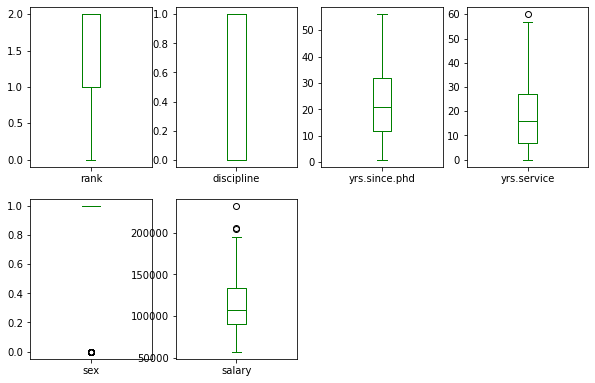

In [298]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10),color='green')

# Removing outliers

In [299]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [300]:
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [301]:
df_new=df[(z<3).all(axis=1)]
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [302]:
df.shape

(397, 6)

In [303]:
df_new.shape

(354, 6)

In [304]:
print('Loss_percent=',(397-354)/397*100)

Loss_percent= 10.831234256926953


In [305]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

# Transforming data to remove skewness

In [306]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [307]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

# Now we will be checking various models and hyperparametrs and decide the best model

In [308]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


In [309]:
poly = PolynomialFeatures(1)
X_=poly.fit_transform(x)
lr =LinearRegression()
lsscore=cross_val_score(lr,X_,y,cv=20)
print(lsscore.mean())

0.2571523384059329


In [310]:
poly = PolynomialFeatures(2)
X_=poly.fit_transform(x)
lr =LinearRegression()
lsscore=cross_val_score(lr,X_,y,cv=20)
print(lsscore.mean())

0.349019042659954


In [311]:
poly = PolynomialFeatures(5)
X_=poly.fit_transform(x)
lr =LinearRegression()
lsscore=cross_val_score(lr,X_,y,cv=20)
print(lsscore.mean())

-1.7848567870369005


In [312]:
poly = PolynomialFeatures(4)
X_=poly.fit_transform(x)
lr =LinearRegression()
lsscore=cross_val_score(lr,X_,y,cv=20)
print(lsscore.mean())

-0.3796237848012062


In [313]:
poly = PolynomialFeatures(3)
X_=poly.fit_transform(x)
lr =LinearRegression()
lsscore=cross_val_score(lr,X_,y,cv=20)
print(lsscore.mean())

0.25579901472896216


# Now building poynomial models with degree 2 and varying random_state

In [314]:
rand_state=[]
RMS_error=[]
r2score=[]
for i in range(0,100):
    poly = PolynomialFeatures(2)
    X_=poly.fit_transform(x)
    lr =LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(X_,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    rand_state.append(i)
    RMS_error.append((mean_squared_error(y_test,y_pred))**0.5)
    r2score.append(r2_score(y_test,y_pred))
print(rand_state)
print(RMS_error)
print(r2score)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[20189.67843084295, 22798.103036665627, 22115.411347409772, 20236.166539423113, 20008.87960592764, 21096.938028945886, 18479.710096957842, 22003.1337873674, 22732.281593522086, 23288.78319274306, 20524.437907590436, 22158.037396526008, 20902.43679675299, 19936.7819528078, 19629.255726241816, 22025.230502223043, 22015.055220922834, 21420.183973316012, 19872.73040845983, 22422.26411027633, 20516.061786791262, 16410.988896141993, 21793.424281869462, 20138.77407864851, 18901.2059433433, 23130.2358320854, 21230.646871717057, 22091.157321489904, 19583.02797650131, 22201.628510564868, 19778.222197196847, 2290

In [315]:
acc = pd.DataFrame(list(zip(rand_state, RMS_error,r2score)),
               columns =['rand_state', 'RMS_error','r2score'])
acc

,rand_state,RMS_error,r2score
0,0,20189.678431,0.517677
1,1,22798.103037,0.492030
2,2,22115.411347,0.448417
3,3,20236.166539,0.520692
4,4,20008.879606,0.625676
...,...,...,...
95,95,25734.365139,0.356311
96,96,21076.183334,0.447712
97,97,20972.212116,0.414432
98,98,21198.769758,0.479114


In [316]:
acc[acc['r2score']==acc['r2score'].max()]

,rand_state,RMS_error,r2score
4,4,20008.879606,0.625676


In [317]:
#from sklearn.ensemble import VotingRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
#from sklearn.neighbors import KNeighborsRegressor

In [318]:

    
#rand_state=[]
#RMS_error=[]
#r2score=[]
#estimator=[]
#estimator.append(('LR',LinearRegression()))
#estimator.append(('DTR',DecisionTreeRegressor()))
#estimator.append(('SVR',SVR()))
#estimator.append(('KNNR',KNeighborsRegressor()))
#for i in range(0,100):




    

    #vot_soft=VotingRegressor(estimators=estimator)
    #x_train,x_test,y_train,y_test=train_test_split(X_,y,random_state=4,test_size=0.20)
    #vot_soft.fit(x_train,y_train)
    #y_pred=vot_soft.predict(x_test)
#print(y_pred)
    #RMS_error.append((mean_squared_error(y_test,y_pred))**0.5)
    #r2score.append(r2_score(y_test,y_pred))

#print(np.array(RMS_error).min())
#print(np.array(r2score).max())

# Now biuldng the final algorithm

In [319]:
poly = PolynomialFeatures(2)
X_=poly.fit_transform(x)
lr =LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X_,y,random_state=4,test_size=0.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Mean_squared_error:',(mean_squared_error(y_test,y_pred))**0.5)
print('r2score:',r2_score(y_test,y_pred))

Mean_squared_error: 20008.87960592764
r2score: 0.6256762952445627


# Model saving

In [321]:
import pickle
filename='prof_salary.pkl'
pickle.dump(lr,open(filename,'wb'))